In [4]:
import sys  
sys.path.insert(0, './../')
import numpy as np
import bbdc2021 as bbdc
import pandas as pd
from importlib import reload
reload(bbdc)
import tensorflow as tf
from keras import layers
import keras
from keras import backend as K
from itertools import groupby
import matplotlib.pyplot as plt
from matplotlib import colors 
import models.cnn.u_net_1d as unet
reload(unet)

<module 'models.cnn.u_net_1d' from './../models/cnn/u_net_1d.py'>

In [ ]:
pathToDataset = "dataset_fft_l1024_o523_b4/"
X_train, Y_train, timepoints, trainDataframe = bbdc.load_data("train.csv", pathToDataset)
X_validation, Y_validation, timepoints, validationDataframe = bbdc.load_data("validation.csv", pathToDataset)  
X_test, Y_test, timepoints, testDataframe = bbdc.load_data("test.csv", pathToDataset)

#X_train_cropped = [np.delete(x,1,0) for x in X_train] #TODO besser lösen
#Y_train_cropped = [np.delete(x,1,0) for x in Y_train] #TODO besser lösen
#X_validation_cropped = [np.delete(x,1,0) for x in X_validation] #TODO besser lösen
#Y_validation_cropped = [np.delete(x,1,0) for x in Y_validation] #TODO besser lösen
#X_test_cropped = [np.delete(x,1,0) for x in X_test] #TODO besser lösen
#Y_test_cropped = [np.delete(x,1,0) for x in Y_test] #TODO besser lösen
inputShape = X_train[0].shape

In [3]:
print(tf.__version__)

2.0.0


In [4]:
channels = [32, 64, 90, 130, 180]
model = unet.u_net(inputShape, channels)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 320, 129)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 320, 32)      12416       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 320, 32)      128         conv1d_1[0][0]                   
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 320, 32)      0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [32]:
#Mit crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])
history = model.fit(np.array(X_train_cropped),np.array(Y_train_cropped), batch_size=15, epochs=15, validation_data=(np.array(X_validation_cropped), np.array(Y_validation_cropped)))

Train on 8000 samples, validate on 1000 samples
Epoch 1/15
8000/8000 [==============================] - 73s 9ms/step - loss: 0.7556 - mae: 0.0485 - val_loss: 2.0145 - val_mae: 0.1110
Epoch 2/15
8000/8000 [==============================] - 61s 8ms/step - loss: 0.6370 - mae: 0.0419 - val_loss: 0.9144 - val_mae: 0.0594
Epoch 3/15
 795/8000 [=>............................] - ETA: 51s - loss: 0.5913 - mae: 0.0391

KeyboardInterrupt: 

In [ ]:
#Mit Dice
model.compile(optimizer='adam', loss=bbdc.dice_loss, metrics=['mae'])
history = model.fit(np.array(X_train),np.array(Y_train), batch_size=15, epochs=5, validation_data=(np.array(X_validation), np.array(Y_validation)))

Train on 8000 samples, validate on 1000 samples
Epoch 1/15
8000/8000 [==============================] - 244s 31ms/step - loss: 0.1698 - mae: 0.0611 - val_loss: 0.5648 - val_mae: 0.1410
Epoch 2/15
8000/8000 [==============================] - 201s 25ms/step - loss: 0.1029 - mae: 0.0363 - val_loss: 0.2296 - val_mae: 0.0698
Epoch 3/15
8000/8000 [==============================] - 184s 23ms/step - loss: 0.0823 - mae: 0.0288 - val_loss: 0.4910 - val_mae: 0.1192
Epoch 4/15
8000/8000 [==============================] - 189s 24ms/step - loss: 0.0702 - mae: 0.0245 - val_loss: 0.2346 - val_mae: 0.0641
Epoch 5/15
8000/8000 [==============================] - 218s 27ms/step - loss: 0.0614 - mae: 0.0215 - val_loss: 0.4815 - val_mae: 0.1213
Epoch 6/15
6390/8000 [======================>.......] - ETA: 54s - loss: 0.0548 - mae: 0.0193

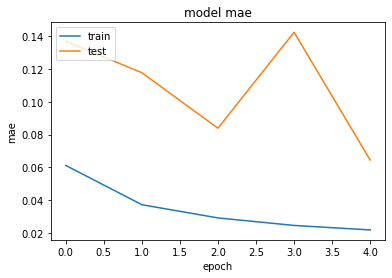

In [11]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

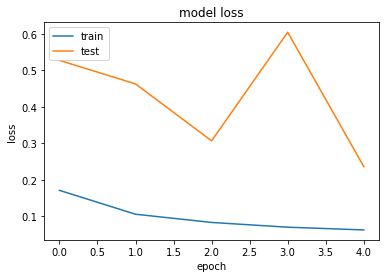

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
prediction = model.predict(np.array(X_test))
df = bbdc.getPredictionAsSequenceDF(prediction, timepoints, testDataframe)
df.head()

,filename,onset,offset,event_label
0,09001_mix.wav,1.221187,1.315125,Cough
1,09001_mix.wav,1.346437,1.565625,Shout
2,09001_mix.wav,1.596937,1.628250,Cheering
3,09001_mix.wav,1.659563,1.941375,Shout
4,09001_mix.wav,1.972688,2.004000,Cheering


In [2]:
bbdc.plotPredictionAndGT(testDataframe, df, 9004, 100)

NameError: name 'bbdc' is not defined